# Project: Showing Up for Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id ='intro'></a>
## Introduction

Hospitals need to undersand the pattern with which their patients show up for their treatment on the appointment day. The data for this study was collected by a hospital in Brazil. The data was collected from patients who lived across 83 regions in the country. This report focused its analysis on the variables available in this dataset to uncover patterns and provide insights into patients' who showed up for their appointment and those who did not. 

**Clarifying Variables:**

For this data,

> **'ScheduledDay'** tells us what day the patient set up their appointment.
>
> **'AppointmentDay'** tells us what day the patient would show up at the hospital.
>
> **'Neighborhood'** indicates the location of the hospital.
>
> **'Scholarship'** indicates whether the patient is enrolled in Brasilian welfare program.
>
> **'Age'** indicates the age of patient
>
> **'No-show'** indicates ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
>
> **'SMS_received'** indicate if the patients received SMS massage before their appointment day.
>
> **'Gender'** indicates whether Male ('M') or Female ('F')
>
> **'Hipertension'** shows whether the patient has hypertension
>
> **'Diabetes'** shows whether the patient is diagnosed of Diabetes
>
> **'Alcoholism'** indicates whether the patient is an alcoholic
>
> **'Handcap'** indicates if the patient has any disability
>
> For the variables: SMS_received', 'Hipertension', 'Diabetes', 'Alcolism', and 'Handcap',  0 represents 'False' and 1 represents 'True'
>
> This analysis adopted the Canadian age classification to group the patients' ages into Child(0 - 14 years), Youth(15 - 24 years), Adults(25 - 64 years), and Seniors(65 years and above)

This analysis was guided by the following research questions: 

1. Which patients' age group have the best show up on their appointment day? 
2. What variables are closely associated with the age group that has the highest attendance?
3. What factors are important in predicting whether a patient will show up for their treatment?


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'><a/>
    
## Data Wrangling
### General Properties

In [133]:
# Load dataset

df_medical= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [134]:
# To have an overview of the dataset
df_medical.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [135]:
# To check for duplicated rows
df_medical.duplicated().sum()   # The result of this command shows there are no duplicates in this dataset.

0

In [136]:
# To check for missing values
df_medical.isna().sum()      # The result of this command shows there are no missing values in this dataset

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [137]:
# Here, I will confirm the if any column is stored in a wrong format.

df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


####  From the information in the three preceeding cells, it is clear that:
1. There are no duplicate values in this dataset
2. There are no missing values in this dataset
3. There are **110527** rows and a total of **14** columns in this data set.
4. The 'PatientId' variable is not properly formated. The data type is stored as float, but would make more more sense as 'integers'
4. The variables names are also written **inconsistently**. Some of the column names are spelt wrongly and lacks a general naming convention. 
5. The 'ScheduledDay' and 'AppointmentDay' columns are stored as *strings* instead of the *date_time* format.

### Data Cleaning - Renaming Columns and Converting Data types
####     In this section, I will be performing some changes to the dataset based on the problems highlighted in the previous section.

#### Fixing and Renaming Columns:

In [138]:
# to confirm the list of columns in the dataset
df_medical.columns.unique()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [139]:
# incorrect spelling of column names will be corrected as well as include an underscore "_" for variables with more than one word. 


df_medical.rename(columns = {'PatientId':'patient_id', 'AppointmentID':'appointment_id',
                             'Scholarship':'scholarship','AppointmentDay':'appointment_day',
                             'Hipertension':'hypertension','Handcap':'handicapped','ScheduledDay':'scheduled_day',
                             'SMS_received':'sms_received','No-show':'no_show'}, inplace=True)


In [140]:
# all variables names will be converted to lowercase to ensure easier handling of columns.

df_medical= df_medical.rename(columns = lambda x: x.strip().lower())

In [141]:
# To confirm changes
df_medical.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


#### Fixing Data types:

#### Converting 'Patient Id' Data Type to 'Integer'

In [142]:
# this piece of code converts the patient Id column to 'Int'
df_medical['patient_id']= df_medical['patient_id'].view('int64')

In [143]:
# confirm changes
df_medical['patient_id'].dtype

dtype('int64')

In [144]:
# this piece of code shows the number of unique values of 'patient_id'
df_medical['patient_id'].nunique()

62299

In [145]:
# this piece of code shows the number of unique values of 'appointment_id'
df_medical['appointment_id'].nunique()

110527

#### Converting 'Scheduled_day' Data Type to 'Datetime'

In [146]:
# this piece of code converts the 'scheduled_day' column to 'datetime'
df_medical['scheduled_day'] = pd.to_datetime(df_medical['scheduled_day'])

In [147]:
# Confirm changes
df_medical.scheduled_day.dtype

datetime64[ns, UTC]

In [148]:
df_medical['scheduled_day'].nunique()

103549

#### Converting 'Appointment_day' Data Type to 'Datetime'

In [149]:
# this piece of code converts the 'appointment_day' column to 'datetime'
df_medical ['appointment_day'] = pd.to_datetime(df_medical['appointment_day'])

In [150]:
# Confirm changes
df_medical.appointment_day.dtype

datetime64[ns, UTC]

In [151]:
# inspect all data types again
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  int64              
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hypertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handicapped      110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

In [152]:
# this piece of code displays the unique values in this column
df_medical.appointment_day.unique()

<DatetimeArray>
['2016-04-29 00:00:00+00:00', '2016-05-03 00:00:00+00:00',
 '2016-05-10 00:00:00+00:00', '2016-05-17 00:00:00+00:00',
 '2016-05-24 00:00:00+00:00', '2016-05-31 00:00:00+00:00',
 '2016-05-02 00:00:00+00:00', '2016-05-30 00:00:00+00:00',
 '2016-05-16 00:00:00+00:00', '2016-05-04 00:00:00+00:00',
 '2016-05-19 00:00:00+00:00', '2016-05-12 00:00:00+00:00',
 '2016-05-06 00:00:00+00:00', '2016-05-20 00:00:00+00:00',
 '2016-05-05 00:00:00+00:00', '2016-05-13 00:00:00+00:00',
 '2016-05-09 00:00:00+00:00', '2016-05-25 00:00:00+00:00',
 '2016-05-11 00:00:00+00:00', '2016-05-18 00:00:00+00:00',
 '2016-05-14 00:00:00+00:00', '2016-06-02 00:00:00+00:00',
 '2016-06-03 00:00:00+00:00', '2016-06-06 00:00:00+00:00',
 '2016-06-07 00:00:00+00:00', '2016-06-01 00:00:00+00:00',
 '2016-06-08 00:00:00+00:00']
Length: 27, dtype: datetime64[ns, UTC]

<a id='eda'><a/>
## Exploratory Data Analysis
### Research Question 1: Which  patients' age group have a better show up best on their appointment day?

### Histogram Plot for Age

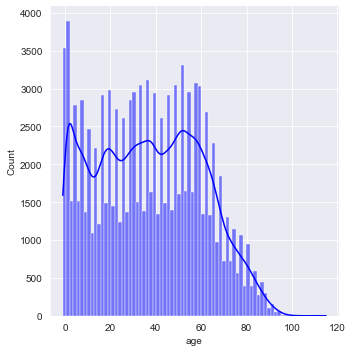

In [153]:
x= df_medical.age
ax= sns.displot(x, color='b', kde=True)

###### Define a function to simplify axis and title labels for graps with "plot.show()"

In [154]:

def plt_show_label(x,y,t):
    
    plt.xlabel(x, font={'size':15})
    plt.ylabel(y, font={'size':15})
    plt.title(t, font={'size':17})

    plt.show()


###### Define a function to simplify axis and title labels for graps with "plot.legend()"

In [155]:

def legend_label(x,y,t):
   
    plt.xlabel(x, font={'size':15})
    plt.ylabel(y, font={'size':15})
    plt.title(t, font={'size':17})

    plt.legend()


###### In the next cell, the patients' ages will be grouped into four categories

In [156]:
# The age of patients will be grouped into four categories

bin_edges=[-2,14,24,64,115]
bin_names=['child', 'youth', 'adult', 'senior']
df_medical['age_group']= pd.cut(df_medical['age'], bin_edges, labels=bin_names)

In [157]:
# To confirm changes
df_medical.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,age_group
0,4808484562731968512,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,adult
1,4827795565713541728,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult


In [158]:
# Filter dataset by patients who showed up on their appointment day
attended= df_medical.query('no_show== "No"')

In [159]:
# group filtered data by number attendance by age group
attendance_count= attended.groupby('age_group').count().gender
attendance_count

age_group
child     18332
youth     10470
adult     47237
senior    12169
Name: gender, dtype: int64

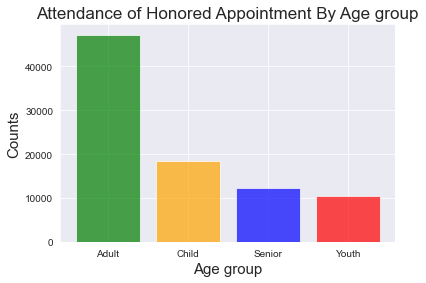

In [160]:
colors=['orange','red', 'green', 'blue']
location= [2,4,1,3]
heights= attendance_count
labels = ['Child','Youth','Adult','Senior']

# define chart parameters
plt.bar(location,heights, tick_label= labels, color=colors, alpha=.7)

# assign x label, y label, and title of chart
plt_show_label('Age group', 'Counts', 'Attendance of Honored Appointment By Age group')

# plot graph
plt.show()

> Presented directly above this cell is a bar chart showing the proportion of the four age groups with respect to whether or not they honored their appointment. **Adults, with a frequency of 47 237**, generally honour their appointment more than the rest of the patients. The **older adults (seniors)** have a rather low attendance frequency (12 169) compared to the Adults.

### Research Question 2: What variables are closely associated with the age group that has the highest attendance?

#### To answer this research question, the variables 'sms received', 'alcoholism'  and 'scholarship' will be explored.


### 2.1 Visualizing Association Between  'sms received' and patients who showed up based on their age groups

In [161]:
# I will load the filtered data for patients who showed up
attended.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,age_group
0,4808484562731968512,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,adult
1,4827795565713541728,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult


In [162]:
# get value counts for the age group column
attended.age_group.value_counts()

adult     47237
child     18332
senior    12169
youth     10470
Name: age_group, dtype: int64

In [163]:
# the filtered data will be grouped by 'sms received' and 'age group'
attended_counts= attended.groupby(['sms_received','age_group']).count().age
attended_counts

sms_received  age_group
0             child        13513
              youth         7562
              adult        32806
              senior        8629
1             child         4819
              youth         2908
              adult        14431
              senior        3540
Name: age, dtype: int64

In [164]:
# get total counts for each age groups
sms_totals = attended.groupby('sms_received').count()['age']
sms_totals

sms_received
0    62510
1    25698
Name: age, dtype: int64

In [165]:
# get proportions by dividing got_sms counts by total number of got_sms samples
got_sms_prop = attended_counts[1] / sms_totals [1]
got_sms_prop

age_group
child     0.187524
youth     0.113161
adult     0.561561
senior    0.137754
Name: age, dtype: float64

In [166]:
# get proportions by dividing no_sms counts by total number of no_sms samples
no_sms_prop = attended_counts[0] / sms_totals [0]
no_sms_prop

age_group
child     0.216173
youth     0.120973
adult     0.524812
senior    0.138042
Name: age, dtype: float64

In [167]:
ind = np.arange(len(got_sms_prop))  # the x locations for the groups
width = 0.35   # the width of the bars

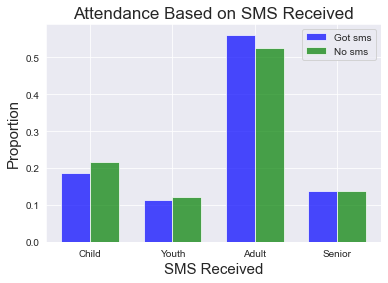

In [168]:
sms_bars = plt.bar(ind, got_sms_prop, width, color='blue', alpha=.7, label='Got sms')
no_sms_bars = plt.bar(ind + width,no_sms_prop, width, color='green', alpha=.7, label='No sms')


# call defined function to assign x label, y label, and title of chart
legend_label('SMS Received', 'Proportion', 'Attendance Based on SMS Received')

locations = ind + width / 2
labels = ['Child', 'Youth','Adult','Senior']  # xtick labels
plt.xticks(locations, labels)


# legend
plt.legend();

>Based on the information on this chart, a slightly higher proportion of patients attended their appointment without receiving an sms as a reminder across all age groups. However the proportion among the adults shows that more adults attended when they receive an sms. Overall, the difference does not appear to be significant enough. This variable will therefore not be considered as an important factor in predicting if a patient will show up for his/her appointment.

### 2.2 Visualizing Association Between  'alcoholism' and patients who showed up based on their age groups

In [169]:
# I will load the filtered data for patients who showed up
attended.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,age_group
0,4808484562731968512,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,adult
1,4827795565713541728,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult


In [170]:
# the filtered data will be grouped by 'alcoholism' and 'age group'
attended_counts= attended.groupby(['alcoholism','age_group']).count().age
attended_counts

alcoholism  age_group
0           child        18324
            youth        10424
            adult        44904
            senior       11873
1           child            8
            youth           46
            adult         2333
            senior         296
Name: age, dtype: int64

In [171]:
# get total counts for each age groups
alcoholism_totals = attended.groupby('alcoholism').count()['age']
alcoholism_totals

alcoholism
0    85525
1     2683
Name: age, dtype: int64

In [172]:
# get proportions by dividing non_alcoholics by total total alcoholism count
non_alcoholic_prop = attended_counts[0] / alcoholism_totals[0]
non_alcoholic_prop

age_group
child     0.214253
youth     0.121882
adult     0.525039
senior    0.138825
Name: age, dtype: float64

In [173]:
# get proportions by dividing alcoholic== 1 by total alcoholism count
alcoholic_prop = attended_counts[1] / alcoholism_totals[1]
alcoholic_prop

age_group
child     0.002982
youth     0.017145
adult     0.869549
senior    0.110324
Name: age, dtype: float64

In [174]:
ind = np.arange(len(alcoholic_prop))  # the x locations for the groups
width = 0.35   # the width of the bars

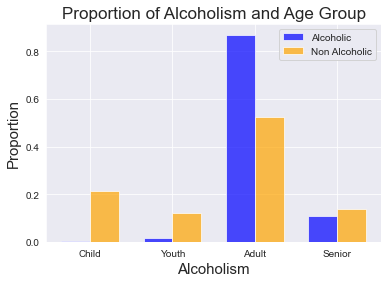

In [175]:
alcoholic_bars = plt.bar(ind, alcoholic_prop, width, color='blue', alpha=.7, label='Alcoholic')
non_alcoholic_bars = plt.bar(ind + width,non_alcoholic_prop, width, color='orange', alpha=.7, label='Non Alcoholic')

figsize=({20,10})

# call defined function to assign x label, y label, and title of chart
legend_label('Alcoholism', 'Proportion', 'Proportion of Alcoholism and Age Group')

locations = ind + width / 2
# xtick labels
labels = ['Child', 'Youth','Adult','Senior']  
plt.xticks(locations, labels)


# legend
plt.legend();

> The above chart displays the relationship between Alcoholism and Age groups among patients who honoured their appointments. A large proportion of alcoholics among the adults honoured their appointments. 

### 2.3 Visualizing Association Between  'scholarship' and patients who showed up based on their age groups

In [176]:
# I will load the filtered data for patients who showed up
attended.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,age_group
0,4808484562731968512,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,adult
1,4827795565713541728,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult


In [177]:
# the filtered data will be grouped by 'scholarship' and 'age group'
attended_counts= attended.groupby(['scholarship','age_group']).count().age
attended_counts

scholarship  age_group
0            child        16475
             youth         9233
             adult        42301
             senior       11916
1            child         1857
             youth         1237
             adult         4936
             senior         253
Name: age, dtype: int64

In [178]:
# get total scholarship counts for each age groups
scholarship_totals = attended.groupby('scholarship').count()['age']
scholarship_totals

scholarship
0    79925
1     8283
Name: age, dtype: int64

In [179]:
# get proportions by dividing scholarship == 0 by total total scholarship count
non_scholarship_prop = attended_counts[0] / scholarship_totals[0]
non_scholarship_prop

age_group
child     0.206131
youth     0.115521
adult     0.529259
senior    0.149090
Name: age, dtype: float64

In [180]:
# get proportions by dividing scholarship == 1 by total alcoholism count
scholarship_prop = attended_counts[1] / scholarship_totals[1]
scholarship_prop 

age_group
child     0.224194
youth     0.149342
adult     0.595919
senior    0.030544
Name: age, dtype: float64

In [181]:
ind = np.arange(len(scholarship_prop))  # the x locations for the groups
width = 0.35   # the width of the bars

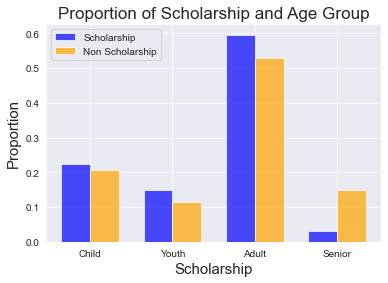

In [182]:
alcoholic_bars = plt.bar(ind, scholarship_prop, width, color='blue', alpha=.7, label='Scholarship')
non_alcoholic_bars = plt.bar(ind + width,non_scholarship_prop, width, color='orange', alpha=.7, label='Non Scholarship')

# call defined function to assign x label, y label, and title of chart
legend_label('Scholarship', 'Proportion', 'Proportion of Scholarship and Age Group')

locations = ind + width / 2
# xtick labels
labels = ['Child', 'Youth','Adult','Senior']  
plt.xticks(locations, labels)


# legend
plt.legend();

We can see from the above chart that a higher proportion of the seniors (65 years old and above) that had obtained a scholarship showed up on their appointment day. There is not much difference among the adults' attendance based on whether or not they obtained a scholarship.



### Research Question 3: What factors are important in order for us to predict whether a patient will show up for their scheduled appointment?

To answer this question, several variables will be explored to study their relationship with patients who honoured their their appointments and those who did not.


### 3.1 Visualizing Appointments Attended and Not Attended

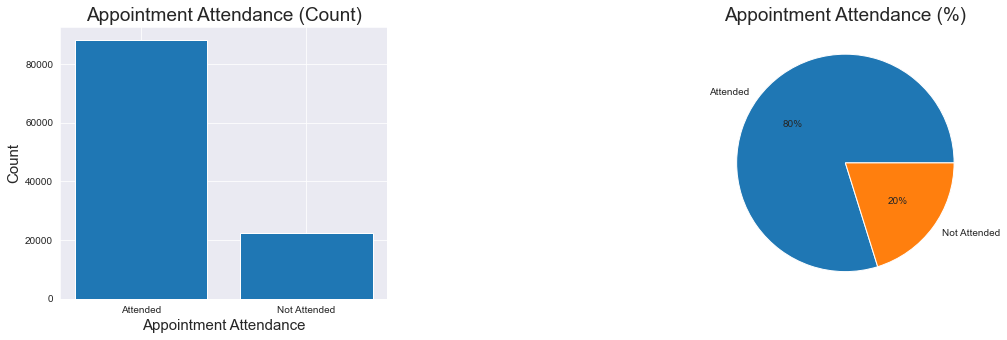

In [183]:
# set figure size
plt.figure(figsize=(17,5))
plt.subplots_adjust(wspace=0.9)
sns.set_style('darkgrid')

# plot of a bar chart showing counts of appointments attended and not attended
plt.subplot(1,2,1)
apt_attendance= df_medical['no_show'].value_counts()

# call defined function to assign x label, y label, and title of chart
plt.bar(['Attended', 'Not Attended'], apt_attendance)
plt.xlabel('Appointment Attendance', font={'size':15})
plt.ylabel('Count', font={'size':15})
plt.title('Appointment Attendance (Count)', font={'size':19})


# plot pie chart to show percentages of appointments attended and not attended
plt.subplot(1,2,2)
plt.pie(apt_attendance, labels=['Attended','Not Attended'], autopct='%1.0f%%')
plt.title('Appointment Attendance (%)', font={'size':19},)

# display chart
plt.show()



The charts (directly) above shows the attendance of patients who showed up and those who did not. The bar chart shows the a plot of the count of patients who attended and those who did not. The pie chart shows the proportion of attendance in percentages.

### 3.2 Visualizing Association Between Scholarship and No_show variable

In [184]:
## I will load the filtered data for patients who showed up
df_medical.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,age_group
0,4808484562731968512,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,adult
1,4827795565713541728,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult


In [185]:
# The data will be grouped by 'no_show' and'scholarship'
no_show_count = df_medical.groupby(['no_show','scholarship']).count().diabetes
no_show_count

no_show  scholarship
No       0              79925
         1               8283
Yes      0              19741
         1               2578
Name: diabetes, dtype: int64

In [186]:
# get total counts for each value of no_show
no_show_total= df_medical.groupby('no_show').count().diabetes
no_show_total

no_show
No     88208
Yes    22319
Name: diabetes, dtype: int64

In [187]:
# get proportions by dividing no_show== "No" by total total 'no_show' count
no_prop= no_show_count['No'] / no_show_total['No']
no_prop

scholarship
0    0.906097
1    0.093903
Name: diabetes, dtype: float64

In [188]:
# get proportions by dividing no_show== "Yes" by total total 'no_show' count
yes_prop= no_show_count['Yes'] / no_show_total['Yes']
yes_prop

scholarship
0    0.884493
1    0.115507
Name: diabetes, dtype: float64

In [189]:
ind = np.arange(len(no_prop)) # the x locations for the groups
width = 0.35 # width of bars

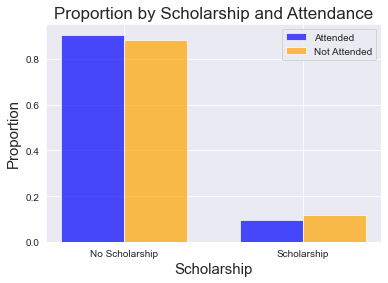

In [190]:
no_prop_bars = plt.bar(ind, no_prop, width, color='blue', alpha=.7, label='Attended')
yes_prop_bars= plt.bar(ind + width, yes_prop, width, color='orange', alpha=.7, label='Not Attended')

# call defined function to assign x label, y label, and title of chart
legend_label('Scholarship', 'Proportion', 'Proportion by Scholarship and Attendance')
# xtick locations
locations = ind + width / 2 
# xtick labels
labels = ['No Scholarship', 'Scholarship']  
plt.xticks(locations, labels)

plt.legend();

This plot is a plot of the proportion of scholarship and Attendance. There is a slightly higher number of attendance among patients without scholarship and a slightly lower number of attendance among patients that got a scholarship. Although there is a slightly higher number of show ups among patients without scholarship, this difference is minute. Consequently, we can only infer that majority of the patients who registered did not receive any scholarship.

This difference in attendance based on scholarship is insignificant and the variable 'scholarship' should not be considered important in predicting whether or not a patient will show up for their appointment. 

### 3.3 Visualizing Association between Alcoholism and No_Show variables

In [191]:
# The data will be grouped by'no_show' and 'alcoholism' 
no_show_count = df_medical.groupby(['no_show','alcoholism']).count().diabetes
no_show_count

no_show  alcoholism
No       0             85525
         1              2683
Yes      0             21642
         1               677
Name: diabetes, dtype: int64

In [192]:
# get total counts for each value of no_show
no_show_total = df_medical.groupby('no_show').count().diabetes
no_show_total 

no_show
No     88208
Yes    22319
Name: diabetes, dtype: int64

In [193]:
# get proportions by dividing no_show== "No" by total 'no_show' count
no_props= no_show_count['No'] /no_show_total['No']
no_props

alcoholism
0    0.969583
1    0.030417
Name: diabetes, dtype: float64

In [194]:
# get proportions by dividing no_show== "Yes" by total 'no_show' count
yes_props= no_show_count['Yes'] / no_show_total['Yes']
yes_props

alcoholism
0    0.969667
1    0.030333
Name: diabetes, dtype: float64

In [195]:
ind = np.arange(len(no_props)) # the x locations for the groups
width = 0.3    # width of the bars

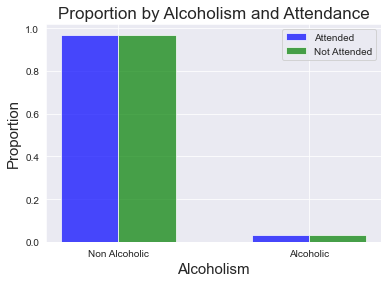

In [196]:
no_props_bars = plt.bar(ind, no_props, width, color='blue', alpha=.7, label='Attended')
yes_props_bars= plt.bar(ind + width, yes_props, width, color='green', alpha=.7, label='Not Attended')

# call defined function to assign x label, y label, and title of chart
legend_label('Alcoholism', 'Proportion', 'Proportion by Alcoholism and Attendance')
# xtick locations
locations = ind + width / 2 
# xtick labels
labels = ['Non Alcoholic', 'Alcoholic']  
plt.xticks(locations, labels)

plt.legend();

This plot shows that there is no difference between patients' attendance based on whether or not the patient is an alcoholic. This variable is therefore not an important factor in predicting if a patient will show up or not.

### 3.4 Visualizing Association Between No_show and all chronic diseases

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

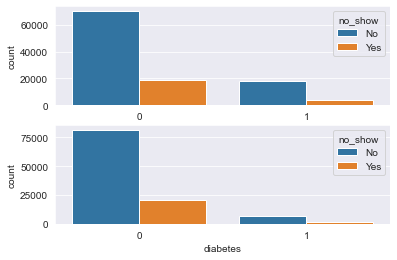

In [197]:
disease = df_medical[['hypertension','diabetes','no_show']]
plt.figure(figsize=(15,10))
# plt.subplot(2,2,1)
# sns.countplot(disease.hypertension,hue=df_medical['no_show'])
# plt.subplot(2,2,2)
# sns.countplot(disease.diabetes,hue=df_medical['no_show'])
# plt.subplot(2,2,3)

# plt.show()
plt.figure(figsize=(15,10))

fig, ax = plt.subplots(2,1)

sns.countplot(x= disease.hypertension, hue=df_medical['no_show'], data= disease, ax=ax[0])
plt.xlabel('Hypertension')


sns.countplot(x= disease.diabetes, hue=df_medical['no_show'], data= disease, ax=ax[1])
plt.show()

The result of the analysis of **'No_show'** and the **chronic diseases** as presented in the chart above (the preceding cell) reveals that a high proportion of the patients showed up for their appointment and did not have any serious underlying health issue. 

### 3.5 Visualizing Association Between No_show and Gender

#### 3.5.1 Visualizing Attendance by Gender Distribution

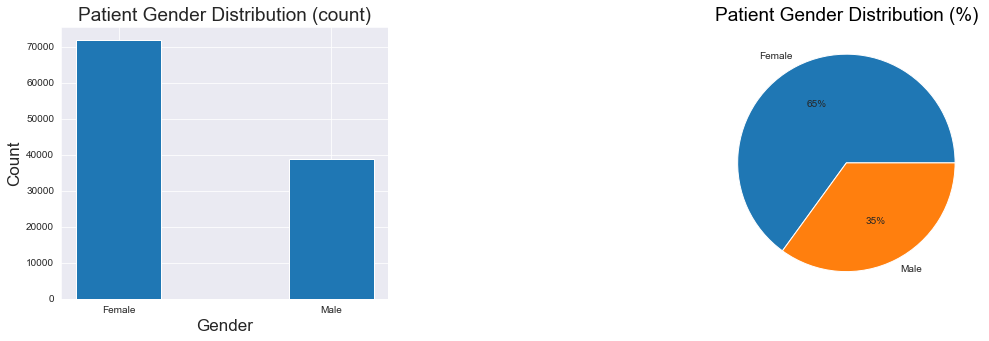

In [198]:
# set figure size
plt.figure(figsize=(17,5))
plt.subplots_adjust(wspace=0.9)
sns.set_style('darkgrid')
counts = df_medical.gender.value_counts()

# plot of a bar chart showing counts of appointments attended and not attended based on gender
plt.subplot(1,2,1)
plt.bar(['Female','Male'], counts, width=0.40)
plt.title('Patient Gender Distribution (count)', fontdict={'size':19})
plt.xlabel('Gender', fontdict={'size':17})
plt.ylabel('Count', fontdict={'size':17})

# plot pie chart to show percentages of appointments attended and not attended

# Assign subplot location
plt.subplot(1,2,2)
x= df_medical.groupby(['gender']).count().age
plt.pie(x, labels=['Female','Male'], autopct='%1.0f%%');
plt.title('Patient Gender Distribution (%)', font={'size':19}, color='black')

# display chart
plt.show()


> According to the charts (directly) above, it can be clearly seen that overall, there is higher number of females patients then the male patients.

#### Visualizing Association Between No_show and Gender

In [199]:
# The data will be grouped by'no_show' and 'gender'
no_show_count = df_medical.groupby(['no_show','gender']).count().diabetes
no_show_count

no_show  gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
Name: diabetes, dtype: int64

In [200]:
# get total counts for each value of no_show
total_count_gender= df_medical.groupby('no_show').count().diabetes
total_count_gender

no_show
No     88208
Yes    22319
Name: diabetes, dtype: int64

In [201]:
# get proportions by dividing no_show== "No" by total 'gender count
no_props= no_show_count['No'] / total_count_gender['No']
no_props

gender
F    0.648989
M    0.351011
Name: diabetes, dtype: float64

In [202]:
# get proportions by dividing no_show== "Yes" by total gender count
yes_props= no_show_count['Yes'] / total_count_gender['Yes']
yes_props

gender
F    0.653882
M    0.346118
Name: diabetes, dtype: float64

In [203]:
# Defining the x locations for the groups
ind = np.arange(len(no_props)) 
width = 0.3

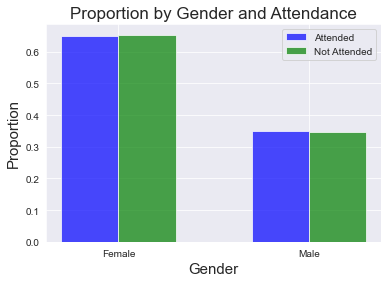

In [204]:
no_props_bars = plt.bar(ind, no_props, width, color='blue', alpha=.7, label='Attended')
yes_props_bars= plt.bar(ind + width, yes_props, width, color='green', alpha=.7, label='Not Attended')

# call defined function to assign x label, y label, and title of chart
legend_label('Gender', 'Proportion', 'Proportion by Gender and Attendance')
 # xtick locations
locations = ind + width / 2 
# xtick labels
labels = ['Female', 'Male']  
plt.xticks(locations, labels)

plt.legend();

Though the number of females is more than the number of males, their proportions are very similar. The bar chart above shows that both proportions of male and female are the same. There is no difference between male and female attendance. This variable **'gender'** will therefore not be considered as an important variable in predicting if a patient will show up.

### 3.6 Visualizing Association Between No_show and Wait time


For the next eight cells, I will be converting the **scheduled_day** and **appointment_day** columns to *date_only* format. This is necessary because the **appointment_day** column does not have a valid 'time' in its timestamp. Once this is done, calculating the period between the columns in **"days"** would be easier. This will be done by subtracting the **scheduled day** column from the **appointment_day** column. These values will then be assigned to a new column, **"wait_time"**.

In [205]:
# extract date from 'scheduled_day' timestamp
df_medical['scheduled_day_only']= df_medical['scheduled_day'].dt.date

In [206]:
# confirm data type
df_medical['scheduled_day_only'].dtype

dtype('O')

In [207]:
# convert column data type from 'object' to 'datetime'
df_medical['scheduled_day_only']= pd.to_datetime(df_medical['scheduled_day_only'])


In [208]:
# confirm changes
df_medical['scheduled_day_only'].dtype

dtype('<M8[ns]')

In [209]:
# extract date from 'appointment_day_only' timestamp
df_medical['appointment_day_only']= df_medical['appointment_day'].dt.date

In [210]:
# convert column data type from 'object' to 'datetime'
df_medical['appointment_day_only']= pd.to_datetime(df_medical['appointment_day_only'])

In [211]:
# Calculate difference between 'appointment_day_only' and 'scheduled_day_only'
df_medical['wait_time']=df_medical.appointment_day_only - df_medical.scheduled_day_only


In [212]:
# confirm data type of 'wait_time' column

df_medical['wait_time'].dtype

dtype('<m8[ns]')

In [213]:
# Confirm changes to columns
df_medical.head(50)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,age_group,scheduled_day_only,appointment_day_only,wait_time
0,4808484562731968512,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,adult,2016-04-29,2016-04-29,0 days
1,4827795565713541728,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult,2016-04-29,2016-04-29,0 days
2,4796056950685136896,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,adult,2016-04-29,2016-04-29,0 days
3,4785429460978417664,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,child,2016-04-29,2016-04-29,0 days
4,4800860290611047936,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,adult,2016-04-29,2016-04-29,0 days
5,4815987450558491264,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,senior,2016-04-27,2016-04-29,2 days
6,4829224706229614504,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,youth,2016-04-27,2016-04-29,2 days
7,4794391662686001152,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,adult,2016-04-27,2016-04-29,2 days
8,4812559327837915648,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,youth,2016-04-29,2016-04-29,0 days
9,4814844374151324736,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,youth,2016-04-27,2016-04-29,2 days


In [214]:
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   patient_id            110527 non-null  int64              
 1   appointment_id        110527 non-null  int64              
 2   gender                110527 non-null  object             
 3   scheduled_day         110527 non-null  datetime64[ns, UTC]
 4   appointment_day       110527 non-null  datetime64[ns, UTC]
 5   age                   110527 non-null  int64              
 6   neighbourhood         110527 non-null  object             
 7   scholarship           110527 non-null  int64              
 8   hypertension          110527 non-null  int64              
 9   diabetes              110527 non-null  int64              
 10  alcoholism            110527 non-null  int64              
 11  handicapped           110527 non-null  int64        

In the next cell, the calculated wait time will be grouped to alllow for easier handling, and provide better insight



In [215]:
# Creating a new column to group the wait time into 9 categories

bin_edges=pd.to_timedelta([0,7,14,21,31,62,92,122,152,182,220], unit='d')

bin_names= ['0 to 7 days', '7 to 14 days', '2 to 3 weeks', '3 weeks to 1 months', '1 to 2 months', '2 to 3 months','4 to 5 months','5 to 6 months','6 to 7 months', '7 to 8 months']

df_medical ['wait_time_category']= pd.cut(df_medical['wait_time'], bin_edges, labels= bin_names,include_lowest=True)
                                      

To avoid redundancy, the initial **scheduled_day** and **appointment_day** columns will be dropped.

In [216]:
# Drop initial columns for 'scheduled day' and 'appointment day'
variables= ['appointment_day', 'scheduled_day']
df_medical.drop(variables, axis=1, inplace=True)

In [217]:
# Confirm changes
df_medical.head(2)

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,age_group,scheduled_day_only,appointment_day_only,wait_time,wait_time_category
0,4808484562731968512,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,adult,2016-04-29,2016-04-29,0 days,0 to 7 days
1,4827795565713541728,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult,2016-04-29,2016-04-29,0 days,0 to 7 days


In [218]:
# filter original data by patients who attended no_show == No
attended_new= df_medical.query('no_show =="No"')
attended_new.head(20)

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,age_group,scheduled_day_only,appointment_day_only,wait_time,wait_time_category
0,4808484562731968512,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,adult,2016-04-29,2016-04-29,0 days,0 to 7 days
1,4827795565713541728,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult,2016-04-29,2016-04-29,0 days,0 to 7 days
2,4796056950685136896,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,adult,2016-04-29,2016-04-29,0 days,0 to 7 days
3,4785429460978417664,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,child,2016-04-29,2016-04-29,0 days,0 to 7 days
4,4800860290611047936,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,adult,2016-04-29,2016-04-29,0 days,0 to 7 days
5,4815987450558491264,5626772,F,76,REPÚBLICA,0,1,0,0,0,0,No,senior,2016-04-27,2016-04-29,2 days,0 to 7 days
8,4812559327837915648,5638447,F,21,ANDORINHAS,0,0,0,0,0,0,No,youth,2016-04-29,2016-04-29,0 days,0 to 7 days
9,4814844374151324736,5629123,F,19,CONQUISTA,0,0,0,0,0,0,No,youth,2016-04-27,2016-04-29,2 days,0 to 7 days
10,4829231490769469176,5630213,F,30,NOVA PALESTINA,0,0,0,0,0,0,No,adult,2016-04-27,2016-04-29,2 days,0 to 7 days
12,4827888439165188712,5634718,F,22,NOVA PALESTINA,1,0,0,0,0,0,No,youth,2016-04-28,2016-04-29,1 days,0 to 7 days


In [219]:
# generate count of wait_time_categories for honored appointments
attended_wait_time= attended_new['wait_time_category'].value_counts()

attended_wait_time

0 to 7 days            61184
7 to 14 days            8361
3 weeks to 1 months     6149
2 to 3 weeks            6013
1 to 2 months           5259
2 to 3 months           1128
4 to 5 months             61
6 to 7 months             38
5 to 6 months             15
7 to 8 months              0
Name: wait_time_category, dtype: int64

In [220]:
# filter original data by patients who do not attend no_show =='Yes'
not_attended_new= df_medical.query('no_show =="Yes"')

# confirm filter action
not_attended_new.head(30)

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,no_show,age_group,scheduled_day_only,appointment_day_only,wait_time,wait_time_category
6,4829224706229614504,5630279,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,youth,2016-04-27,2016-04-29,2 days,0 to 7 days
7,4794391662686001152,5630575,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,adult,2016-04-27,2016-04-29,2 days,0 to 7 days
11,4799553985723485184,5620163,M,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,adult,2016-04-26,2016-04-29,3 days,0 to 7 days
17,4803908625839458304,5633460,F,40,CONQUISTA,1,0,0,0,0,0,Yes,adult,2016-04-28,2016-04-29,1 days,0 to 7 days
20,4828333260616996392,5626083,F,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,adult,2016-04-27,2016-04-29,2 days,0 to 7 days
21,4802556883151029760,5628338,F,4,CONQUISTA,0,0,0,0,0,0,Yes,child,2016-04-27,2016-04-29,2 days,0 to 7 days
22,4830261039464902264,5616091,M,13,CONQUISTA,0,0,0,0,0,1,Yes,child,2016-04-25,2016-04-29,4 days,0 to 7 days
31,4778915696058187776,5628907,M,12,NOVA PALESTINA,1,0,0,0,0,0,Yes,child,2016-04-27,2016-04-29,2 days,0 to 7 days
44,4778295839480217600,5635414,F,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,senior,2016-04-28,2016-04-29,1 days,0 to 7 days
48,4800580508663441408,5618643,F,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes,adult,2016-04-26,2016-04-29,3 days,0 to 7 days


In [221]:
# generate count of wait_time_categories for dishonoured appointments
not_attended_wait_time= not_attended_new['wait_time_category'].value_counts()

# confirm action
not_attended_wait_time

0 to 7 days            9564
7 to 14 days           3664
3 weeks to 1 months    3020
2 to 3 weeks           2861
1 to 2 months          2680
2 to 3 months           481
6 to 7 months            17
4 to 5 months            15
5 to 6 months            12
7 to 8 months             0
Name: wait_time_category, dtype: int64

#### Line Plot of Wait time categories for Honoured and Dishonoured Appointments

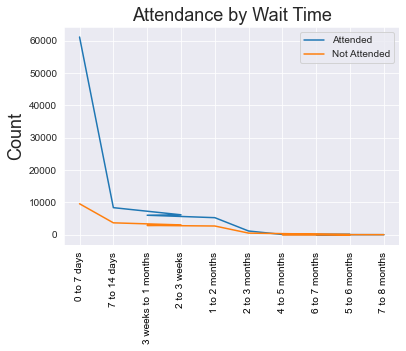

In [223]:
# Set rotation angle for values on x axis
plt.xticks(rotation=90, color='black')
plt.title('Attendance by Wait Time', font={'size':18})
plt.ylabel('Count', font={'size':18})

# plot a line for attended
plt.plot(attended_wait_time, label='Attended')

# plot a line for not attended
plt.plot(not_attended_wait_time, label= 'Not Attended')


# display chart
plt.legend()
plt.show();

> The line plot of wait_time_category against 'no_show' reveals there is an incredible high turnover of patients for their appointments when the period of days between the scheduled day and the appointment day is between 0 to 7 days. Result of this analysis suggests that there is a strong relationship between shorter wait time and better turnups for patients' appointments.

<a id='conclusions'><a/>
## Conclusions


The data used for this study is centered on whether a patient showed up for his/her appointment or not. Simple countplot showed that 80% of the appointments were honoured, while 20% of the appointments did not hold. Based gender, 65% of the appointees were female while 35% were male. Appointments were made by patients of several age groups, adults having the highest appointments attendance of 47,237, and the children coming next with a frequency of 18,332 in attendance. 

Several features were explored to determine their relationship with one another. 

It was discovered that the 'adults' generally honour their appointments better than any of the other age groups. Further investigation was carried out to suggest factors responsible for this and it was discovered that alcoholic patients show up better on their appointment days.Important to note is that a slightly higher proportion of the adults who had obtained scholarships honoured their appointments.

Also, several variables were compared to determine what factors are important in predicting whether a patient will show up on their appointment. Of all the variables compared, the 'wait_time' was found to be most associated with whether a patient will show up or not. Patients who did not have any chronic disease (hypertension and diabetes) also appeared to show up better on their appointment days. These two variables according to the analysis in this report should be considered as important factors that can be used to predict if a patient will show up or not.

One limitation of this analysis is that no special statistical technique was used in carrying out any of the analysis. As a result, the inferences do not imply causation.



# References

> [geekforgeeks](https://www.geeksforgeeks.org)
>
> [stack overflow](https://www.stackoverflow.com)
>
> [google](https://www.google.com)
